In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [5]:
usd_rates = pd.read_excel("usd_rate17-2005.xlsx")

In [36]:
curs = usd_rates.curs

In [37]:
curs

0      59.8961
1      59.9533
2      60.1614
3      59.4978
4      59.3700
        ...   
817    73.8725
818    73.4326
819    73.5819
820    73.9298
821    73.2056
Name: curs, Length: 822, dtype: float64

In [30]:
future = 7 # predicting USD rate for next 7 days
past = 14  # based on 14 days in the past

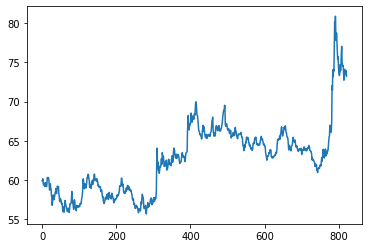

In [9]:
curs.plot()

In [44]:
start = past
end = len(curs) - future
print(end-start)

801


In [33]:
x = curs[(200-past):(200+future)]
# len(x)
x

186    57.5811
187    57.7612
188    58.3151
189    58.0713
190    57.9210
191    57.6869
192    57.6196
193    57.0861
194    57.3392
195    57.2721
196    57.5706
197    57.5118
198    57.4706
199    57.5852
200    57.6140
201    57.7643
202    58.0833
203    57.8716
204    58.1179
205    58.1557
206    58.0869
Name: curs, dtype: float64

In [54]:
raw_df = [list(curs[(day-past):(day+future)]) for day in range(start, end)] # additionally it has to be convereted in list, others it shows NaN

In [45]:
past_columns = [f"past_{i+1}" for i in range(past)]

future_columns = [f"future_{i+1}" for i in range(future)]
# future_columns


In [57]:
df = pd.DataFrame(data=raw_df, columns=(past_columns+future_columns))

In [62]:
# training slice data

# input data
X = df[past_columns][:-1]
Y = df[future_columns][:-1]


In [79]:
# testing slice data

X_test = df[past_columns][-1:]
Y_test = df[future_columns][-1:]

In [71]:
lr = LinearRegression()
lr.fit(X, Y)

LinearRegression()

In [91]:
prediction = lr.predict(X_test)[0]
prediction

array([73.4296563 , 73.10567783, 73.13197554, 73.06761863, 72.56439721,
       72.54448411, 72.77049828])

In [87]:
real_values = Y_test.iloc[0]

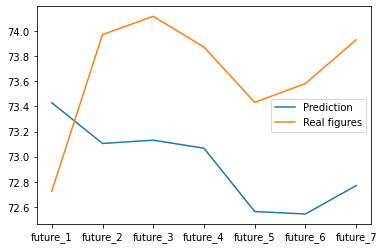

In [104]:
plt.plot(prediction, label='Prediction')
plt.plot(real_values, label='Real figures')

plt.legend()

In [93]:
# Get 'mean' value

mean_absolute_error(prediction, real_values)

0.917757813394705

In [139]:
# Predict by neighbors

KNR = KNeighborsRegressor(n_neighbors=20)

In [140]:
KNR.fit(X, Y)

KNeighborsRegressor(n_neighbors=20)

In [141]:
prediction2 = KNR.predict(X_test)[0]

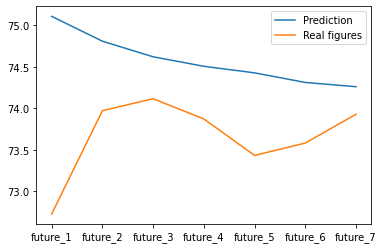

In [142]:
plt.plot(prediction2, label='Prediction')
plt.plot(real_values, label='Real figures')

plt.legend()

In [143]:
mean_absolute_error(prediction2, real_values)

0.9171757142857209

In [183]:
# hidden_layer_sizes=(50, 50, 50) 3 layers of neurons
# 'random_state=42' helps you normalize prediction, to get predictable output. Not affecting your model

MLP = MLPRegressor(max_iter=500, hidden_layer_sizes=(200, 200), random_state=42)

In [181]:
MLP.fit(X, Y)

MLPRegressor(hidden_layer_sizes=(200, 200), max_iter=500, random_state=42)

1.4355462935286698

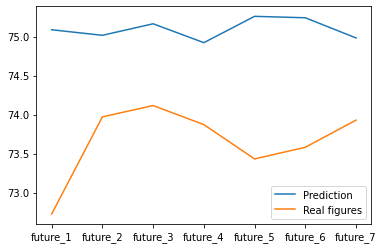

In [182]:
prediction3 = MLP.predict(X_test)[0]

plt.plot(prediction3, label='Prediction')
plt.plot(real_values, label='Real figures')

plt.legend()

mean_absolute_error(prediction3, real_values)